# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем нужные библиотеки для работы и смотрим общую информацию о данных

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

display(data.head())

data.info()

data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


#### Построим общую гистограмму для всех числовых столбцов таблицы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

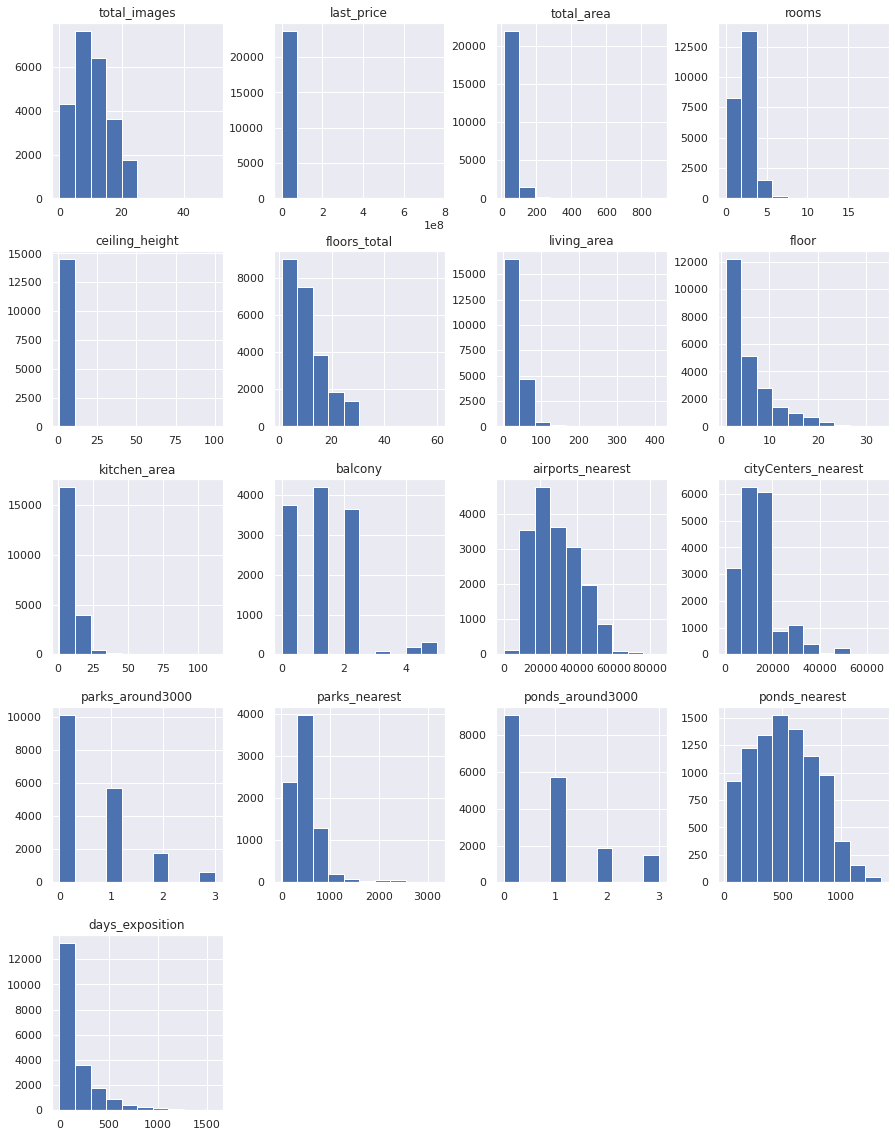

In [2]:
data.hist(figsize=(15, 20))

#### Вывод: 
* Всего 23699 записей
* Многие столбцы имеют пропущенные значения и некорректные типы данных
* Присутствую аномальные значения

В общем данные не готовы к работе, нужно привести их в порядок. Особое внимание следует уделить заполнению пропущенных значений


### Предобработка данных

#### Узучим пропущенные значения в данных

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Начнём со столбца "is_apparment", в нём мы можем наблюдать наибольшее количество пропусков

In [4]:
print(data['is_apartment'].unique())
print(data.query('is_apartment != True or is_apartment != False')['is_apartment'].count())
data.loc[data['is_apartment'].isna()]


[nan False True]
2775


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,NaN,False,False,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,NaN,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00


Вероятнее всего, большое количество пропусков обеспечено тем, что в объявлении продавцы часто пропускают этот пункт, скорее всего недвижимость с пропущенным значением в стоблце 'is_apartment' апартаментами не являются. Поэтому заменим неизвестные данные значением False и приведём столбец к типу данных bool.

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].unique())
data.head()

[False  True]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,False,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Отлично, избавились от пропусков в, на первый взгляд, самым проблемном столбце

#### Столбец "airports_nearest"

Количество пропусков в этом столбце не должно сильно повлиять на выборку. Тем более, если заполнить пропуски медианными или средними значениями расстояния, то это может исказить данные ещё сильнее. Скорее всего пропуски в данных образовались от того, что при выгрузке данных расстояние до аэропорта было слишком велико и просто не записалось в данные, так что оставим пропуски как есть.
Однако в данном в столбце всё равно нужно навести порядок.

In [6]:
data['airports_nearest'].describe()

count   18,157.00
mean    28,793.67
std     12,630.88
min          0.00
25%     18,585.00
50%     26,726.00
75%     37,273.00
max     84,869.00
Name: airports_nearest, dtype: float64

Здесь мы можем наблюдать нереалистичное минимальное значение: 0 метров до аэропорта. Посмотрим много ли значений с такой ошибкой

In [7]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,"7,000,000.00",34.70,2018-09-23T00:00:00,1,2.70,9.00,19.80,3,False,False,False,6.00,2.00,Санкт-Петербург,0.00,"22,801.00",0.00,NaN,0.00,NaN,60.00


In [8]:
#Всего одно значение, меняем его с 0 на None
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None

In [9]:
data['airports_nearest'].min()

6450.0

Минимальное значение в 6450 метров больше похоже на правду.

#### Cтолбец "cityCenters_nearest"

Переименуем столбец в однотипный формат

In [10]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', }, inplace=True)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,False,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.00",133.81,2017-03-21T00:00:00,3,3.70,5.00,73.30,3,False,False,False,13.83,NaN,Санкт-Петербург,"24,665.00","4,232.00",1.00,796.00,3.00,381.00,NaN
23695,14,"3,100,000.00",59.00,2018-01-15T00:00:00,3,NaN,5.00,38.00,4,False,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.00
23696,18,"2,500,000.00",56.70,2018-02-11T00:00:00,2,NaN,3.00,29.70,1,False,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.00",76.75,2017-03-28T00:00:00,2,3.00,17.00,NaN,12,False,False,False,23.30,2.00,Санкт-Петербург,"39,140.00","10,364.00",2.00,173.00,3.00,196.00,602.00


In [11]:
data['city_centers_nearest'].describe()

count   18,180.00
mean    14,191.28
std      8,608.39
min        181.00
25%      9,238.00
50%     13,098.50
75%     16,293.00
max     65,968.00
Name: city_centers_nearest, dtype: float64

В данном случае минимальное и максимальное значения выглядят правдоподобно. Что касается пропусков, здесь схожая ситуация, как со столбцом 'airports_nearest' 

#### "Столбец ponds_around3000"

Переименуем столбец в однотипный формат

In [12]:
data.rename(columns = {'ponds_around3000':'ponds_around_3000', }, inplace=True)

Проверим ещё раз на наличие пропусков

In [13]:
data['ponds_around_3000'].isna().sum()

5518

Здесь скорее всего причина пропуска такая же, как и у столбцов airports_nearest и city_centers_nearest, однако в этом случае мы можем заменить пропущенные значения на 0, так как, парков в допустимых пределах нет.

In [14]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype('int') #заодно приведём к целочисненному типу данных
data['ponds_around_3000'].isna().sum()

0

#### "Столбец parks_around3000"

Столбец схож с предыдущим, поэтому делаем с ним тоже самое

In [15]:
data.rename(columns = {'parks_around3000':'parks_around_3000', }, inplace=True)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')
data['parks_around_3000'].isna().sum()

0

#### Столбец "parks_nearest"

In [16]:
data['parks_nearest'].describe()

count   8,079.00
mean      490.80
std       342.32
min         1.00
25%       288.00
50%       455.00
75%       612.00
max     3,190.00
Name: parks_nearest, dtype: float64

In [17]:
data['parks_nearest'].isna().sum()

15620

В этом столбце мы может наиблюдать огромный процент пропусков, однако по той же причине, что и в столбцах city_centers_nearest и airports_nearest, пропуски заполнять мы не будем, так как это может ещё сильнее исказить данные

#### Столбец "ponds_nearest"

In [18]:
data['ponds_nearest'].describe()

count   9,110.00
mean      517.98
std       277.72
min        13.00
25%       294.00
50%       502.00
75%       729.00
max     1,344.00
Name: ponds_nearest, dtype: float64

In [19]:
data['ponds_nearest'].isna().sum()

14589

Таже самая ситуация, что и у столбца 'parks_nearest'

#### Столбец "locality_name"

В первую очередь исследуем столбец на предмет уникальных значений

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
data['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
деревня Большой Сабск             1
деревня Терпилицы                 1
посёлок Форт Красная Горка        1
деревня Каськово                  1
поселок Севастьяново              1
Name: locality_name, Length: 364, dtype: int64

Приведём значение к нижнему регистру, чтобы избежать дубликатов

In [22]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

Заменим букву "е" на букву "ё" в слове посёлок, так как это, вероятно, основная причина появления дубликатов

In [23]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'посёлок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'посёлок молодцово',
       'посёлок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'посёлок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'посёлок торковичи', 'посёлок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посёлок новый свет

Вероятная причина возникновения дубликатов — человеческий фактор. 
Теперь займёмся пропусками

#### Столбец "days_exposition"

In [24]:
data['days_exposition'].describe()

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [25]:
data['days_exposition'].isna().sum()

3181

В этом столбце пропуски заменить невозможно, так как медианое и среднее значения не подойдут. Также пропуски могут означать, что объявление ещё актуально.

#### Столбец "first_day_exposition"

Здесь нужно просто привести дату к более удобному формату

In [26]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

#### Столбец "balcony"

In [27]:
data['balcony'].describe()

count   12,180.00
mean         1.15
std          1.07
min          0.00
25%          0.00
50%          1.00
75%          2.00
max          5.00
Name: balcony, dtype: float64

In [28]:
data['balcony'].isna().sum()

11519

Здесь достаточно больше количество пропусков. Скорее всего продавцы просто не заполняли данные, о балконах, если те отсутствуют, поэтому можно замените все пропуски на 0

In [29]:
data['balcony'] = data['balcony'].fillna(value=0).astype('int')#заодно приведём к целочисленному типу
data['balcony'].isna().sum()

0

#### Столбец "rooms"

In [30]:
data['rooms'].isna().sum()

0

In [31]:
data['rooms'].describe()

count   23,699.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

Минимальное количество комнат, равное 0 выглядит странно, возможно ошибка, стоит проверить.

In [32]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Слишком много нулевых значений для ошибки, возможно так обозначены квартиры студии, проверим.

In [33]:
data.loc[(data['rooms'] == 0) & (data['studio'] ==True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
144,1,"2,450,000.00",27.00,2017-03-30,0,NaN,24.00,15.50,2,False,True,False,NaN,2,посёлок мурино,NaN,NaN,0,NaN,0,NaN,181.00
440,8,"2,480,000.00",27.11,2018-03-12,0,NaN,17.00,24.75,4,False,True,False,NaN,2,санкт-петербург,"38,171.00","15,015.00",0,NaN,2,982.00,64.00
608,2,"1,850,000.00",25.00,2019-02-20,0,NaN,10.00,NaN,7,False,True,False,NaN,0,посёлок шушары,NaN,NaN,0,NaN,0,NaN,29.00
697,12,"2,500,000.00",24.10,2017-12-01,0,2.75,25.00,17.50,21,False,True,False,NaN,0,деревня кудрово,NaN,NaN,0,NaN,0,NaN,201.00
716,5,"1,500,000.00",17.00,2017-06-07,0,2.70,9.00,12.00,1,False,True,False,NaN,0,посёлок шушары,"18,654.00","29,846.00",0,NaN,0,NaN,40.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,"3,090,000.00",30.00,2017-12-17,0,NaN,25.00,18.20,5,False,True,False,NaN,0,санкт-петербург,"35,250.00","16,414.00",0,NaN,1,400.00,211.00
22877,2,"4,280,000.00",28.00,2017-10-26,0,2.70,19.00,18.00,10,False,True,False,NaN,0,санкт-петербург,"18,982.00","7,206.00",0,NaN,1,415.00,151.00
23210,7,"3,200,000.00",26.00,2017-09-01,0,NaN,25.00,18.00,16,False,True,False,NaN,0,санкт-петербург,"11,405.00","13,222.00",0,NaN,1,623.00,14.00
23554,15,"3,350,000.00",26.00,2018-09-07,0,NaN,19.00,NaN,8,False,True,False,NaN,0,санкт-петербург,"18,090.00","17,092.00",0,NaN,2,112.00,31.00


Действительно большинство нулевых значений является студиями. Можно оставить как есть.

#### Столбец "ceiling_height"

In [34]:
data['ceiling_height'].describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Вряд ли потолки могут быть высотой 1 метр или  100 метров, нужно избавиться от аномальных значений. Минимальное значение высоты потолков равняется 2.5 метров. Максимально ограничим 7 метрами.

In [35]:
data.loc[(data['ceiling_height'] > 7) & (data['ceiling_height'] > 2.5), 'ceiling_height'] = None

In [36]:
data['ceiling_height'].describe()

count   14,475.00
mean         2.73
std          0.28
min          1.00
25%          2.51
50%          2.65
75%          2.80
max          6.00
Name: ceiling_height, dtype: float64

Пропуски заменим медианным значением. Возможная причина пропусков — человеческий фактор, продавец решил не вносить этот параметр

In [37]:
data['ceiling_height'].median()

2.65

In [38]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [39]:
data['ceiling_height'].isna().sum()

0

#### Столбец "floors_total"

In [40]:
data['floors_total'].describe()

count   23,613.00
mean        10.67
std          6.60
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

In [41]:
data['floors_total'].isna().sum()

86

Количество пропусков невелико, можно оставить как есть. Возможная причина пропусков — человеческий фактор, продавец решил не указывать этажность всего дома.

#### Столбец "living_area"

In [42]:
data['living_area'].describe()

count   21,796.00
mean        34.46
std         22.03
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

In [43]:
data['living_area'].isna().sum()


1903

Возможная причина пропусков — продавец указал общую площадь, забыв про жилую площадь. Здесь пропуски можно заполнить разницей между значениями total_area и kitchen_area, но только если большинство пропусков в living_area не совпадают с пропусками в kinchen_area. Проверим.

In [44]:
data.loc[(data['living_area'].isna()) & (data['kitchen_area'].isna())]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0,санкт-петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00
30,12,"2,200,000.00",32.80,2018-02-19,1,2.65,9.00,NaN,2,False,False,False,NaN,0,коммунар,NaN,NaN,0,NaN,0,NaN,63.00
37,10,"1,990,000.00",45.80,2017-10-28,2,2.50,5.00,NaN,1,False,False,False,NaN,0,посёлок городского типа красный бор,NaN,NaN,0,NaN,0,NaN,196.00
44,13,"5,350,000.00",40.00,2018-11-18,1,2.65,22.00,NaN,3,False,False,False,NaN,1,санкт-петербург,"30,471.00","11,603.00",1,620.00,1,"1,152.00",NaN
59,15,"6,300,000.00",46.50,2017-03-06,1,2.65,13.00,NaN,13,False,False,False,NaN,0,санкт-петербург,"11,125.00","14,501.00",0,NaN,0,NaN,336.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,"5,000,000.00",38.00,2018-06-23,1,2.55,16.00,NaN,15,False,False,False,NaN,1,санкт-петербург,"31,118.00","7,257.00",1,241.00,1,230.00,113.00
23642,14,"5,950,000.00",80.30,2018-07-03,3,2.70,12.00,NaN,5,False,False,False,NaN,0,колпино,"27,933.00","33,719.00",0,NaN,2,562.00,60.00
23663,12,"6,400,000.00",88.00,2018-01-12,4,2.55,10.00,NaN,1,False,False,False,NaN,0,санкт-петербург,"33,642.00","13,943.00",0,NaN,2,844.00,59.00
23670,9,"2,450,000.00",45.60,2018-02-08,1,2.80,9.00,NaN,2,False,False,False,NaN,0,посёлок городского типа синявино,NaN,NaN,0,NaN,0,NaN,45.00


1464 совпадения — это абсолютное большинство, похоже придётся оставить пропуски как есть. Но можно избавиться от аномальных значений. Вряд ли существуют квартиры с площадью 2 кв.м. Ограничим минимальное значение 10кв.м.

In [45]:
data.loc[data['living_area'] < 10, 'living_area'] = None

In [46]:
data['living_area'].describe()

count   21,771.00
mean        34.49
std         22.02
min         10.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

#### Столбец "kitchen_area"

In [47]:
data['kitchen_area'].describe()

count   21,421.00
mean        10.57
std          5.91
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

In [48]:
data['kitchen_area'].isna().sum()

2278

Аналогичная ситуация, что и с 'living_area', оставим пропуски как есть, избавимся от аномальных значений

In [49]:
data.loc[data['kitchen_area'] < 5, 'kitchen_area'] = None

In [50]:
data['kitchen_area'].describe()

count   21,316.00
mean        10.60
std          5.90
min          5.00
25%          7.00
50%          9.20
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

#### Столбец "total_area"

Поменяем тип данных на целочисленный

In [51]:
data['total_area'] = data['total_area'].astype(int)
data['total_area'].describe

<bound method NDFrame.describe of 0        108
1         40
2         56
3        159
4        100
        ... 
23694    133
23695     59
23696     56
23697     76
23698     32
Name: total_area, Length: 23699, dtype: int64>

#### Столбец "last_price"

In [52]:
data['last_price'].describe()

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

In [53]:
data['last_price'] = data['last_price'].astype(int)

Перевели столбец в целочисленный тип

#### Проверка изменений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN
1,7,3350000,40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00
2,10,5196000,56,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00
3,0,64900000,159,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0,санкт-петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00
4,2,10000000,100,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,санкт-петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21771 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21316 non-null  float64       
 13  balcony         

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'first_day_exposition'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>],
       [<AxesSubplot:title={'center':'city_centers_nearest'}>,
        <AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>],
       [<AxesSubplot:title={'center':'ponds_nearest'}>,
        <AxesSubplot:title={'center':'days_expositi

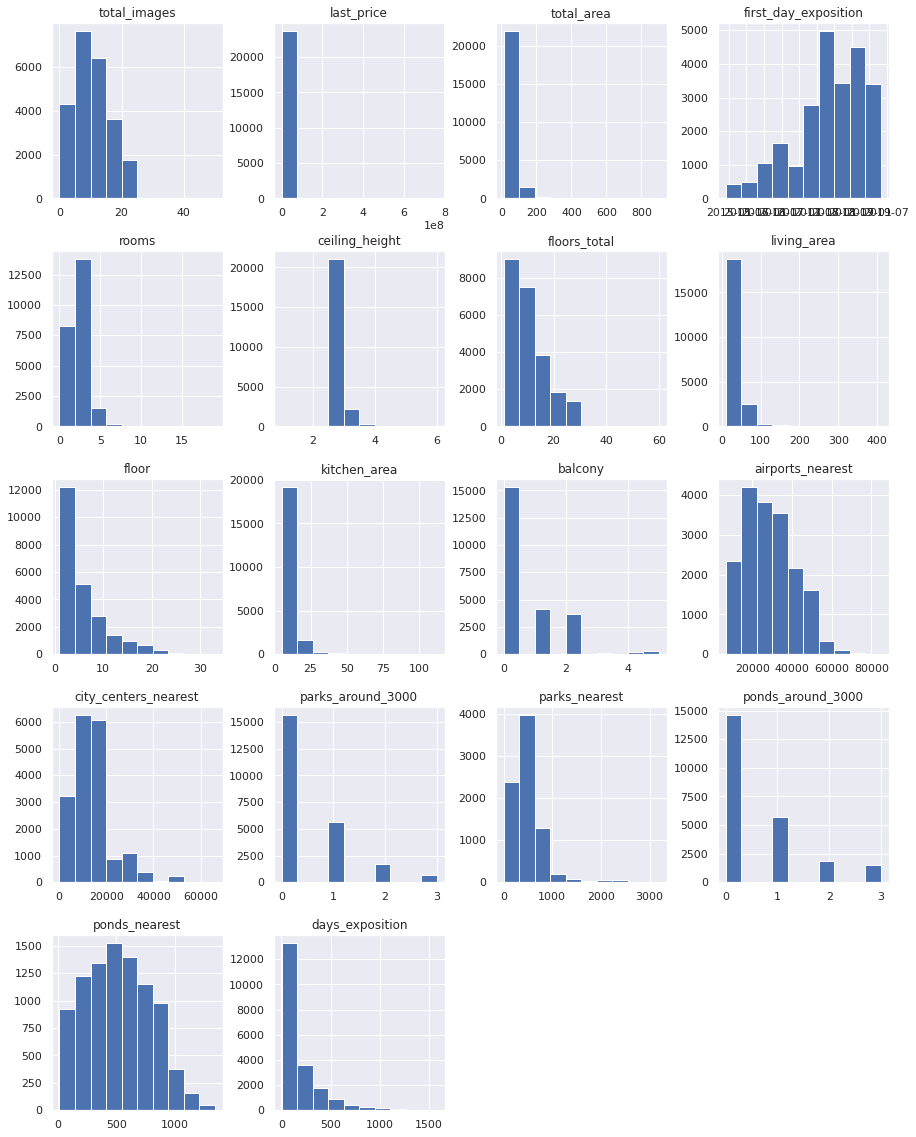

In [54]:
display(data.head())

data.info()

data.describe()

data.hist(figsize=(15, 20))

#### Вывод

Данные поправили, теперь они стали пригодными к обработке. В кратце по каждому исправлению:
* "living_area" и "kitchen_area" пропуски оставили как есть.Вероятная причина пропусков — продавец заполнил только общую площадь. Избавились от аномальных значений.
* "ceiling_height" заполнили пропуски медианными значениями, избавились от аномальных значений. Вероятная причина пропуской — продавец не заполнил параметр.
* "floors_total" пропусков мало, на результаты исследования не повлияют, оставили как есть. Веряотная причина пропусков — продавец не заполнил параметр.
* "rooms" предположили, что нулевое количество комнат обозначает квартиры студии. Сопоставили данные по таблице — гипотеза подтвердилась.
* "balcony" нулевые значения заполнили нулём. Вероятная причина пропусков — при отсутствии балкона, продавец не заполнял параметр
* "first_day_exposition" перевели дату в более удобный формат.
* "days_exposition" оставили пропуски. Вероятная причина пропусков — пропущенные значения это актуальные объявления
* "locality_name" избавились от дубликатов. Вероятная причина появления дубликатов — человеческий фактор
* "ponds_nearest", "park_nearest", "ponds_around_3000", "parks_around_3000", "city_centers_nearest", "airport_nearest" Вероятных причины пропуска две: 1) Программа не выгружала данные превышающие лимит. 2) Продавец не заполнял слишком большие значения, так как счёл их неважными.
* "is_apparment" заполнили пропуски, заменили на нули. Вероятная причина пропусков — продавец не указывал данные, если квартира не являлась аппартаментами.
* "total_area" поменяли тип данных на целочисленный
* "last_price" поменяли тип данных на целочисленный

### Посчитайте и добавьте в таблицу новые столбцы

#### Посчитаем и добавим в таблицу цену одного квадратного метра

In [55]:
data['square_meter_price'] = data['last_price']/data['total_area']

In [56]:
data['square_meter_price'] = data['square_meter_price'].astype('int') # приведём к целочисленному типу данных
data #проверим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price
0,20,13000000,108,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN,120370
1,7,3350000,40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00,83750
2,10,5196000,56,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00,92785
3,0,64900000,159,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0,санкт-петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00,408176
4,2,10000000,100,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,санкт-петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121.00,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5.00,73.30,3,False,False,False,13.83,0,санкт-петербург,"24,665.00","4,232.00",1,796.00,3,381.00,NaN,72932
23695,14,3100000,59,2018-01-15,3,2.65,5.00,38.00,4,False,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.00,52542
23696,18,2500000,56,2018-02-11,2,2.65,3.00,29.70,1,False,False,False,NaN,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642
23697,13,11475000,76,2017-03-28,2,3.00,17.00,NaN,12,False,False,False,23.30,2,санкт-петербург,"39,140.00","10,364.00",2,173.00,3,196.00,602.00,150986


#### Добавим день недели, месяц и год публикации объявления

In [57]:
data['day_of_week_exposition']= data['first_day_exposition'].dt.weekday #день недели (0-понедельник, 1-вторник, 2-среда и т. д.)
data['month_exposition']=data['first_day_exposition'].dt.month #месяц
data['years_exposition']=data['first_day_exposition'].dt.year #год
data.head() #проверим изменения

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,day_of_week_exposition,month_exposition,years_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN,120370,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00,83750,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00,92785,3,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0,санкт-петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00,408176,4,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,санкт-петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121.00,100000,1,6,2018


#### Разделим на группы этажи квартир

In [58]:
last_floor = data.query('floors_total/floor == 1')
data['grouped_floor'] = data['floor']
data.loc[data['grouped_floor'] == 1, 'grouped_floor'] = 'Первый'
data.loc[last_floor.index, 'grouped_floor'] = 'Последний'
data.loc[(data['grouped_floor'] != 'Первый') & (data['grouped_floor']!='Последний'), 'grouped_floor'] = 'Другой'
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,day_of_week_exposition,month_exposition,years_exposition,grouped_floor
0,20,13000000,108,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN,120370,3,3,2019,Другой
1,7,3350000,40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00,83750,1,12,2018,Первый
2,10,5196000,56,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00,92785,3,8,2015,Другой
3,0,64900000,159,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0,санкт-петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00,408176,4,7,2015,Другой
4,2,10000000,100,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,санкт-петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121.00,100000,1,6,2018,Другой


#### Добавим расстояние до центра города в километрах

In [59]:
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round(0)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,day_of_week_exposition,month_exposition,years_exposition,grouped_floor,city_centers_nearest_km
0,20,13000000,108,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN,120370,3,3,2019,Другой,16.00
1,7,3350000,40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,посёлок шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00,83750,1,12,2018,Первый,19.00
2,10,5196000,56,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00,92785,3,8,2015,Другой,14.00
3,0,64900000,159,2015-07-24,3,2.65,14.00,NaN,9,False,False,False,NaN,0,санкт-петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00,408176,4,7,2015,Другой,7.00
4,2,10000000,100,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,санкт-петербург,"31,856.00","8,098.00",2,112.00,1,48.00,121.00,100000,1,6,2018,Другой,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5.00,73.30,3,False,False,False,13.83,0,санкт-петербург,"24,665.00","4,232.00",1,796.00,3,381.00,NaN,72932,1,3,2017,Другой,4.00
23695,14,3100000,59,2018-01-15,3,2.65,5.00,38.00,4,False,False,False,8.50,0,тосно,NaN,NaN,0,NaN,0,NaN,45.00,52542,0,1,2018,Другой,NaN
23696,18,2500000,56,2018-02-11,2,2.65,3.00,29.70,1,False,False,False,NaN,0,село рождествено,NaN,NaN,0,NaN,0,NaN,NaN,44642,6,2,2018,Первый,NaN
23697,13,11475000,76,2017-03-28,2,3.00,17.00,NaN,12,False,False,False,23.30,2,санкт-петербург,"39,140.00","10,364.00",2,173.00,3,196.00,602.00,150986,1,3,2017,Другой,10.00


#### Вывод

В таблицу были добавлены столбцы со следующими данными:
* Цена одного квадратного метра
* День недели, месяц и год публикации
* Сгруппированные типы этажей
* Расстояние до центра города в километрах

Все необходимые данные обработаны и дополнены, можно приступать к анализу

### Проведите исследовательский анализ данных

#### Изучим параметры общей площади

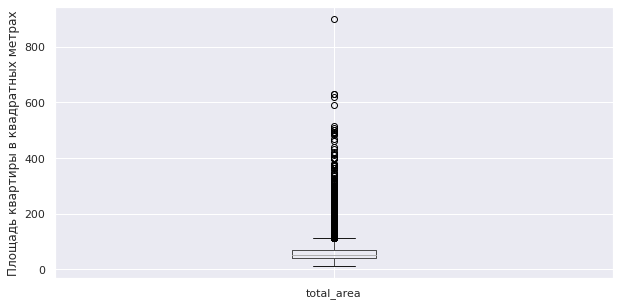

In [60]:
data.boxplot(column=['total_area'], figsize=(10,5), grid=True)
plt.ylabel('Площадь квартиры в квадратных метрах')
plt.show()

Ящик с усами показывает нам, что данные свыше 100 кв.м слишком сильно выбиваются из остальных значений. Но количество значений свыше 100 кв.м слишком велико, чтобы их отсечь. Ограничим данные 400 кв.м

In [61]:
good_data = data.query('total_area <= 400')
good_data['total_area'].describe()

count   23,676.00
mean        59.68
std         32.66
min         12.00
25%         40.00
50%         52.00
75%         69.00
max        400.00
Name: total_area, dtype: float64

Отлично, теперь можем строить гистограмму

Text(0, 0.5, 'Количество предложений')

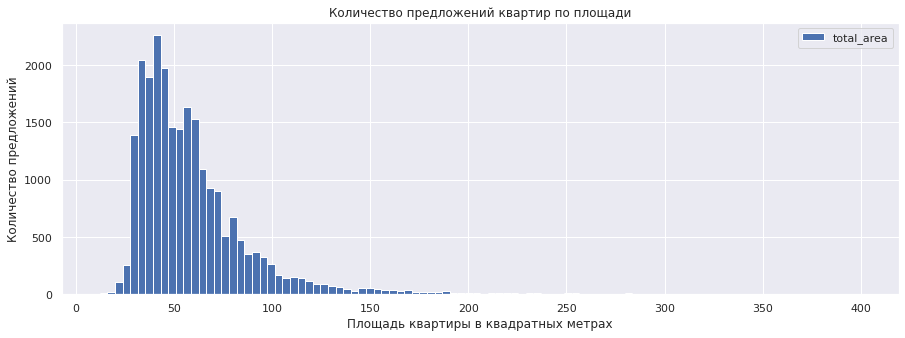

In [62]:
good_data.sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area',title='Количество предложений квартир по площади',bins=100, figsize=(15,5), grid=True)

plt.xlabel('Площадь квартиры в квадратных метрах')
plt.ylabel('Количество предложений')

Данные выглядят правдоподобно.

#### Изучим параметры жилых площадей

Text(0, 0.5, 'Количество предложений')

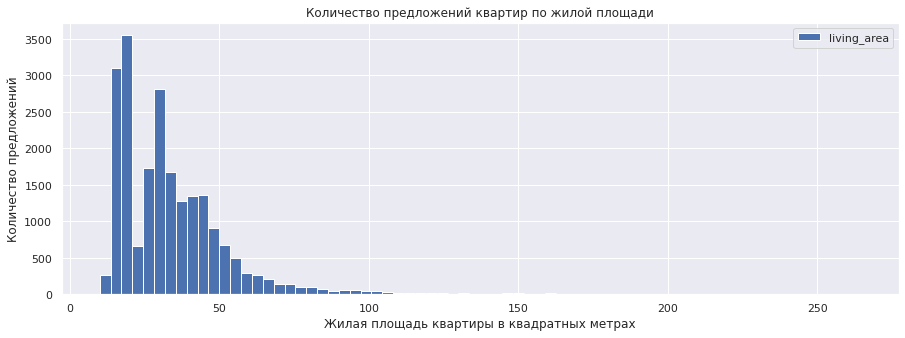

In [63]:
good_data.sort_values(by='living_area', ascending=True).plot(kind='hist', y='living_area',title='Количество предложений квартир по жилой площади',bins=70, figsize=(15,5), grid=True)

plt.xlabel('Жилая площадь квартиры в квадратных метрах')
plt.ylabel('Количество предложений')

Данные не такие ровные, как в total_area, однако 3 пика на графике обеспечены жилой площадью для 1-комнатной, 2-комнатной и 3-комнатной квартир. Также большая просадка в значениях от 20 до 30 обеспечена тем, что квартиры студии как раз чаще всего имеют площадь от 20 до 30 кв.м, и в случае квартиры студии, вероятно продавец указывал общую площадь и большинство пропусков образовалось именно в этом промежутке.

#### Изучим параметры площадей кухни

Text(0, 0.5, 'Количество предложений')

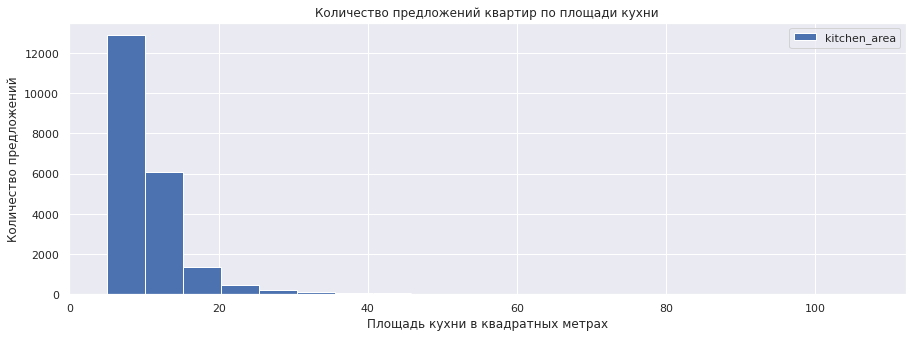

In [64]:
good_data.sort_values(by='kitchen_area', ascending=True).plot(kind='hist', y='kitchen_area',title='Количество предложений квартир по площади кухни',bins=20, figsize=(15,5), grid=True)

plt.xlabel('Площадь кухни в квадратных метрах')
plt.ylabel('Количество предложений')

Наибольшее количество кухонь имеет площадь от 5 до 10 кв.м. Вполне логично, учитывая что 5 кв.м это минимальная плошадь кухни, согласно СНиП, а 9-10 кв.м считается нормой в современных новостройках.

#### Изучим параметры стоимости квартир

Text(0, 0.5, 'Количество квартир')

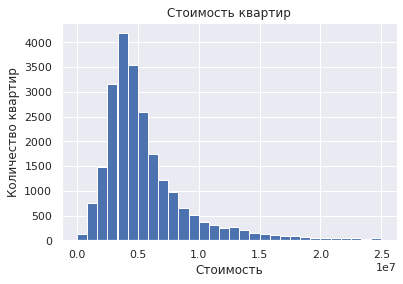

In [65]:
plt.hist(data['last_price'], bins=30, range=(0,25000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')

На гистограмме мы можем наблюдать, что большинство квартир имеют стоимость в диапозоне от 2 до 30 млн. Можно отсечь квартиры стоимостью выше.

In [66]:
good_data = good_data.query('last_price <= 30000000')

Text(0, 0.5, 'Количество квартир')

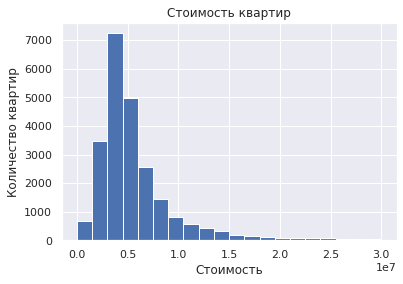

In [67]:
plt.hist(good_data['last_price'], bins=20)
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')

Данные выглядят правдоподобно.

#### Изучим параметры количества комнат

Text(0, 0.5, 'Количесивр комнат в квартирах')

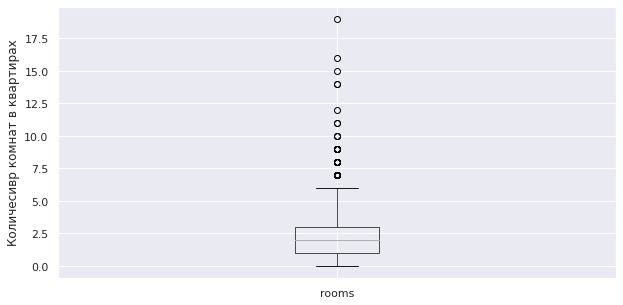

In [68]:
data.boxplot(column=['rooms'], figsize=(10,5), grid=True)
plt.ylabel('Количесивр комнат в квартирах')

Можно отсечь данные о квартирах, где больше 10 комнат

In [69]:
good_data = data.query('rooms <= 10')

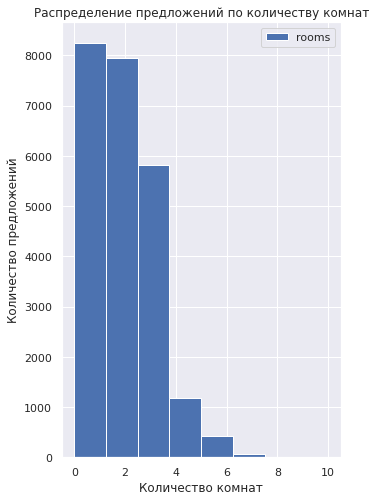

In [70]:
good_data.plot(kind='hist',y='rooms',title='Распределение предложений по количеству комнат',grid=True, bins=8, figsize=(5,8))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()


Как и ожидалось, большая часть квартир имеют 1, 2 или 3 комнаты

#### Изучим параметры высоты потолков

Text(0, 0.5, 'Высота потолков в квартирах')

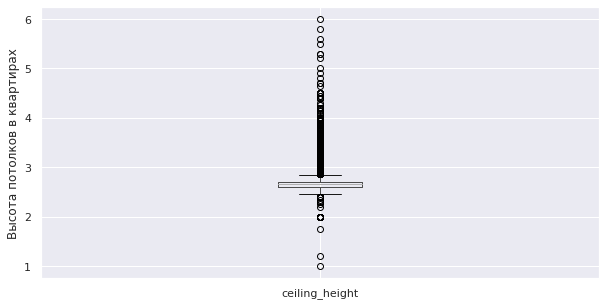

In [71]:
data.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.ylabel('Высота потолков в квартирах')

Ограничим данные диапозоном высоты от 2 до 5 метров

Text(0, 0.5, 'Количество предложений')

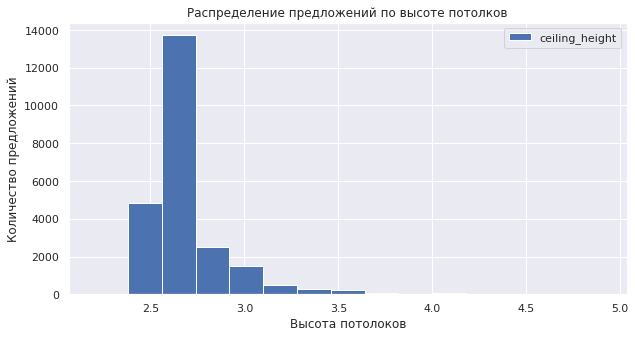

In [72]:
good_data = good_data.query('2 < ceiling_height < 5')
good_data.plot(kind='hist',y='ceiling_height',grid=True, bins=15, figsize=(10,5),title='Распределение предложений по высоте потолков')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений')

Наиболее популярная высота потолков от 2.5 до 2.7 метров, что логично, учитывая что согласно нормам 2.5 метра минимальная высота потолка.

#### Изучим параметры данных о этаже квартиры

Text(0, 0.5, 'Количество предложений')

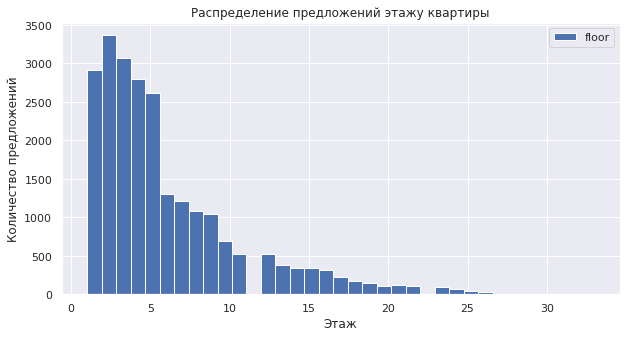

In [73]:
good_data.plot(kind='hist',y='floor',grid=True, bins=35, figsize=(10,5),title='Распределение предложений этажу квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество предложений')

Большинство квартир продаётся на втором этаже. Что логично, ведь спрос на квартиры на первом этаже обычно ниже, а квартиры на третьем этаже исключаются из выборки двухэтажных домов. После 5-го этажа количество квартир начинает падать, скорее всего это связано с обильном количеством советской 5-этажной застройки.

#### Изучим параметры данных о типе этажа квартиры

Text(0, 0.5, 'Количество квартир')

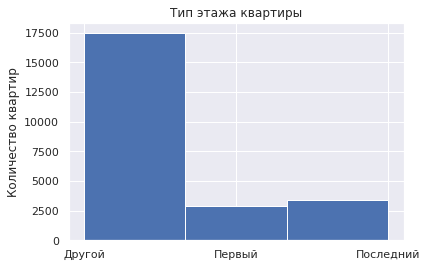

In [74]:
plt.hist(data['grouped_floor'], bins=3)
plt.title('Тип этажа квартиры')
plt.ylabel('Количество квартир')

Здесь всё очевидно: естественно, что большинство домов имеет больше двух этажей, количество этажей межу первым и последним будет больше. Однако здесь, пускай и не слишком явно, но тоже можно заметить тенденцию, что предложений по продаже квартир на первом этаже меньше всего. Это связано с более низким спросом на квартиры на первом этаже

#### Изучим параметры данных о этажности дома

Text(0, 0.5, 'Количество предложений')

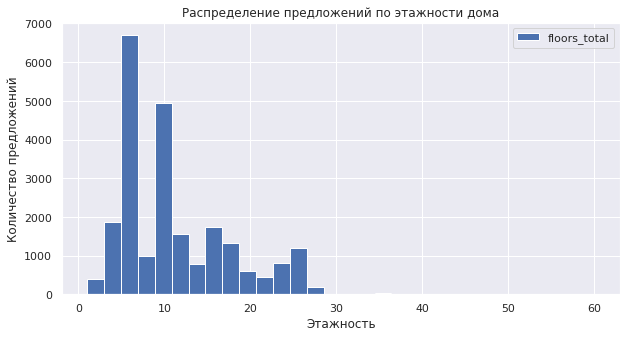

In [75]:
good_data.plot(kind='hist',y='floors_total',grid=True, bins=30, figsize=(10,5),title='Распределение предложений по этажности дома')
plt.xlabel('Этажность')
plt.ylabel('Количество предложений')

Как и упоминалось ранее, больше всего домов имеют 5 этажей, в следствие массовой советской застройки. Тоже самое и с 9-этажными домами, которые идут вторыми. Также можно заметить тенденцию небольшого увеличения количества высокоэтажных домов, это связано с активным строительством новых домов.

#### Изучим параметры данных о расстоянии до центра города в метрах

Text(0, 0.5, 'Количество предложений')

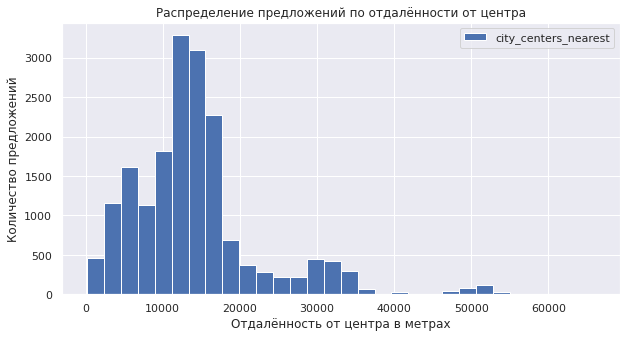

In [76]:
good_data.plot(kind='hist',y='city_centers_nearest',grid=True, bins=30, figsize=(10,5),title='Распределение предложений по отдалённости от центра')
plt.xlabel('Отдалённость от центра в метрах')
plt.ylabel('Количество предложений')

Наибольшее количество квартир продаётся в пределах 10-17 км от центра. Для Санкт-Петербурга это правдоподобные показатели, так как центр Петербурга в основе своей является исторической застройкой, следовательно, большинство жилых домов расположено на приличном расстоянии от центра.

#### Изучим параметры данных о расстоянии до ближайшего аэропорта

Text(0, 0.5, 'Количество предложений')

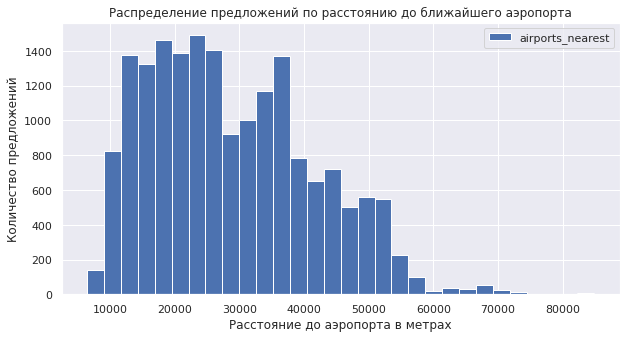

In [77]:
good_data.plot(kind='hist',y='airports_nearest',grid=True, bins=30, figsize=(10,5),title='Распределение предложений по расстоянию до ближайшего аэропорта')
plt.xlabel('Расстояние до аэропорта в метрах')
plt.ylabel('Количество предложений')

От Петербурга до аэропорта Пулково примерно 20 км, а от второго по числу объявлений населённого пункта Мурино: около 40 км, так что данные выглядят правдопободно. Значения больших расстояний обеспечивают квартиры, находящиеся в области

#### Изучим параметры данных о расстоянии до ближайшего парка

Text(0, 0.5, 'Количество предложений')

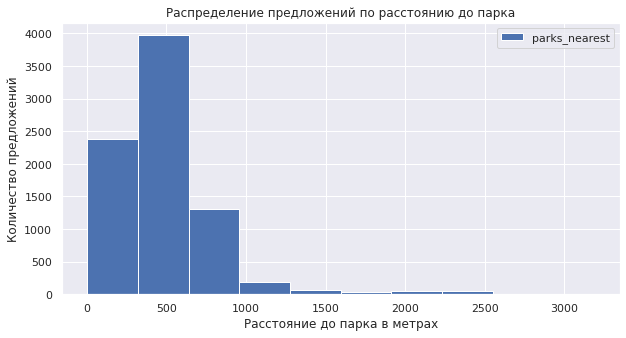

In [78]:
good_data.plot(kind='hist',y='parks_nearest',grid=True, bins=10, figsize=(10,5),title='Распределение предложений по расстоянию до парка')
plt.xlabel('Расстояние до парка в метрах')
plt.ylabel('Количество предложений')

Большинство квартир имеют показатели в 400-600 метров до парка. Это связано с тем, что этот показатель, вероятно, заполняется только в случае близкого нахождения к парку.

#### Изучим параметры данных о дне и месяце публикации объявления

Text(0, 0.5, 'Количество предложений')

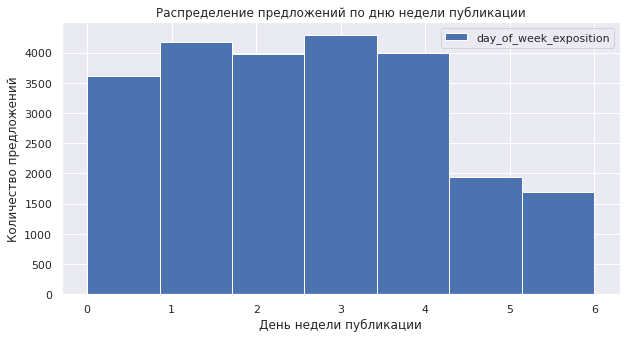

In [79]:
good_data.plot(kind='hist',y='day_of_week_exposition',grid=True, bins=7, figsize=(10,5),title='Распределение предложений по дню недели публикации')
plt.xlabel('День недели публикации')
plt.ylabel('Количество предложений')

Text(0, 0.5, 'Количество предложений')

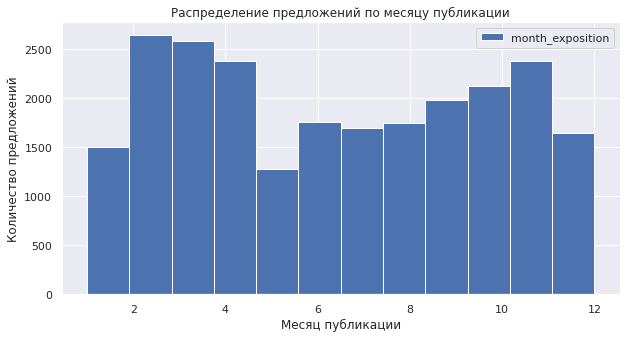

In [80]:
good_data.plot(kind='hist',y='month_exposition',grid=True, bins=12, figsize=(10,5),title='Распределение предложений по месяцу публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество предложений')

Можно заметить, что большинство объявлений публикуется в будние дни. Вероятно это связано с тем, что продавцам во время выходных не до объявлений. Схожая ситуация с месяцом публикации. Количество публикаций падает на новогодние и майские праздники.

#### Изучим скорость продажи квартир с помощью столбца days_exposition

Text(0, 0.5, 'Количество предложений')

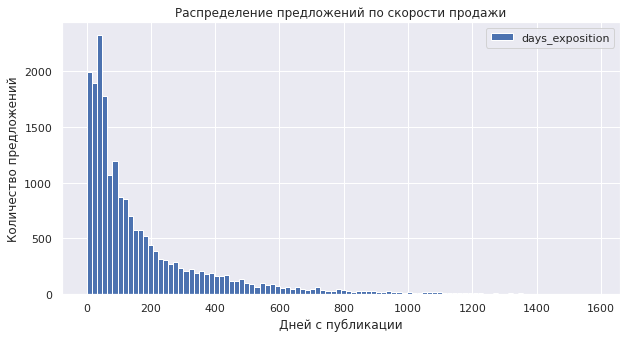

In [81]:
good_data.plot(kind='hist',y='days_exposition',grid=True, bins=100, figsize=(10,5),title='Распределение предложений по скорости продажи')
plt.xlabel('Дней с публикации')
plt.ylabel('Количество предложений')

Общая гистограмма выглядит так, будто большинство объявлений снимают сразу же после публикации, думаю стоит рассмотреть этот промежуток поближе.

Text(0, 0.5, 'Количество предложений')

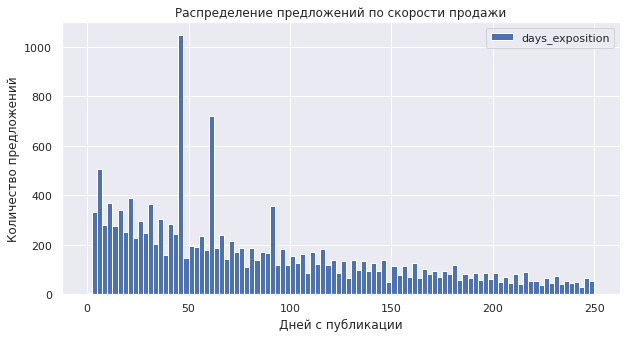

In [82]:
good_data.plot(kind='hist',y='days_exposition',grid=True, bins=100, figsize=(10,5),title='Распределение предложений по скорости продажи', range=(0,250))
plt.xlabel('Дней с публикации')
plt.ylabel('Количество предложений')

Теперь всё стало яснее. Большинство квартир продаётся за 2-3 месяца, выглядит вполне правдопободно. Однако слишком много объявлений снимают почти сразу после публикации. Предположу, что дело частично в том, что продавцы могли допускать ошибки в объявлении, и вместо того, чтобы редактировать его — загружают вновь. Также, возможно, статистику портят фальшивые объявления, которые спустя время снимала с публикации администрация.

Посчитаем медиану и среднее значение. Для чистоты подсчётов, отсечём слишком долгие продажи.

In [83]:
good_sale = good_data.query('days_exposition < 250')
print('Среднее значение:', good_sale['days_exposition'].mean())
print('Медаинное значение:', good_sale['days_exposition'].median())

Среднее значение: 83.23658443540184
Медаинное значение: 63.0


##### Проверим не отбросили ли мы слишком много данных

In [84]:
data.shape[0] / good_data.shape[0]

1.0012674806709199

Похоже всё в порядке

##### Вывод:
* В среднем продажа квартиры занимает 2-3 месяца
* Быстрыми можно считать продажи от недели до месяца.
* Необычно долгими можно назвать продажи от 200 дней. Вероятно это квартиры с необычной планировкой, завышенной ценой или плохим состоянием. Также возможно продавец просто слишком тщательно выбирает покупателя.

#### Изучим какие факторы больше всего влияют на общую стоимость объекта

Сопоставим данные из столбца с полной ценой с данными о:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Для начала посмотрим как сильно общая площадь влияет на цену.

Корреляция цены и площади:
0.6417548721486751


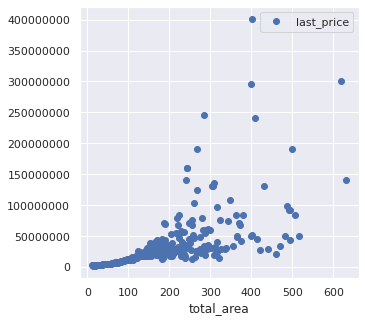

In [85]:
good_data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.ticklabel_format(style='plain')
print('Корреляция цены и площади:')
print(good_data['last_price'].corr(good_data['total_area']))


Корреляция положительная и достаточно сильная. С уверенностью можно сказать, что чем больше общая площадь квартиры, тем больше и цена.

Далее рассмотрим корреляцию с жилой площадью

Корреляция цены и жилой площади:
0.5575928527092324


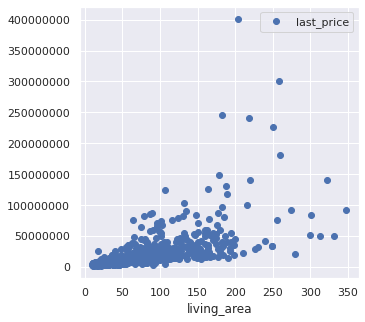

In [86]:
good_data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.ticklabel_format(style='plain')
print('Корреляция цены и жилой площади:')
print(good_data['last_price'].corr(good_data['living_area']))

Здесь корреляция тоже положительная, но слабее, однако всё равно можно сделать вывод, что размер жилой площади влияет на размер цены за квартиру

Далее рассмотрим корреляцию с площадью кухни

Корреляция цены и кухонной площади:
0.5078195926601197


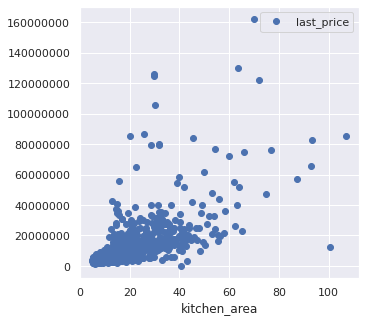

In [87]:
good_data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.ticklabel_format(style='plain')
print('Корреляция цены и кухонной площади:')
print(good_data['last_price'].corr(good_data['kitchen_area']))

Корреляция положительная, но уже более слабая, однако всё равно прослеживается явно

Далее рассмотрим корреляцию цены с количеством комнат.

Корреляция цены и количества комнат:
0.3584381250949332


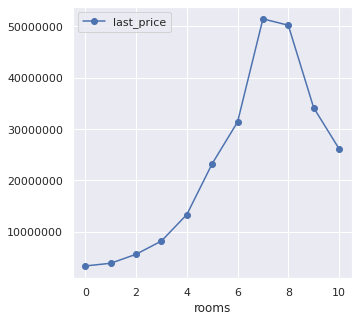

In [88]:
good_data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.ticklabel_format(style='plain')
print('Корреляция цены и количества комнат:')
print(good_data['last_price'].corr(good_data['rooms']))

Корреляция небольшая положительная. Из странного можно заметить, что цена после 8 комнат резко падает вниз. Возможно проблема в том, что больше 8 комнат имеют квартиры с очень нестандартной планировкой, возможно какие-то рабочие помещения.

Далее корреляция цены и типа этажа.

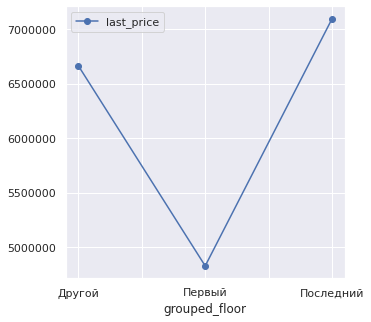

In [89]:
good_data.pivot_table(index='grouped_floor', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.ticklabel_format(axis='y', style='plain')


Можно наблюдать, что цена на квартиры на первом этаже ощутимо ниже, на чуть более 20 процентов. Вероятно это связано с неудобствами первого этажа. В целом можно сказать, что  корреляция небольшая корреляция есть.

Далее корреляция цены с днём, месяцем и годом публикации объявления

Корреляция цены и дня недели публикации объявления:
0.0021565203136776584


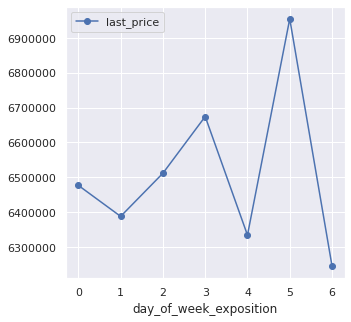

In [90]:
good_data.pivot_table(index='day_of_week_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.ticklabel_format(axis='y', style='plain')
print('Корреляция цены и дня недели публикации объявления:')
print(good_data['last_price'].corr(good_data['day_of_week_exposition']))

Корреляция отсутствует.

Корреляция цены и месяца публикации объявления:
0.00026350818268760563


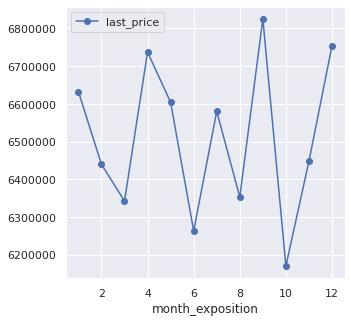

In [91]:
good_data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.ticklabel_format(axis='y', style='plain')
print('Корреляция цены и месяца публикации объявления:')
print(good_data['last_price'].corr(good_data['month_exposition']))

Корреляция отсутствует.

Корреляция цены и года публикации объявления:
-0.04347617102222429


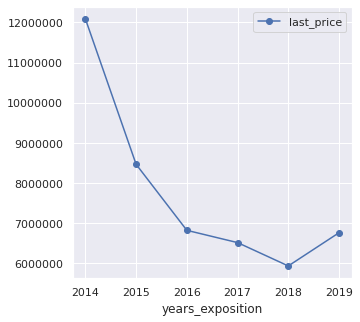

In [92]:
good_data.pivot_table(index='years_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.ticklabel_format(axis='y', style='plain')
print('Корреляция цены и года публикации объявления:')
print(good_data['last_price'].corr(good_data['years_exposition']))

Явная корреляция отсутствует, но можно наблюдать достаточно резкое падение цен на недвижимость с 2014 года по 2016. Это связано с аномальным спросом на недвижимость в 2014 году и последующим кризисом. С 2016 года значения держались в норме, но немного падали, после 2018 пошёл небольшой рост.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [93]:
data['locality_name'].value_counts().head(10) #посмотрим первую десятку

санкт-петербург      15721
посёлок мурино         556
посёлок шушары         440
всеволожск             398
пушкин                 369
колпино                338
посёлок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [94]:
#Отделим первую десятку от остального массива данных
good_data2 = data.query('locality_name in ["санкт-петербург", "посёлок мурино", "посёлок шушары", "всеволожск", "пушкин", "колпино", "посёлок парголово", "гатчина", "деревня кудрово", "выборг"]')

In [95]:
#Создадим свобдную таблицу по первой десятке и цене за кв.м.
good_data2.pivot_table(index='locality_name', values='square_meter_price').sort_values(by='square_meter_price', ascending=False) 

,square_meter_price
locality_name,
санкт-петербург,"115,347.30"
пушкин,"103,610.95"
деревня кудрово,"93,001.74"
посёлок парголово,"90,675.24"
посёлок мурино,"86,311.62"
посёлок шушары,"79,068.19"
колпино,"75,735.15"
гатчина,"69,045.07"
всеволожск,"68,984.80"


Наибольшая цена за квадратный метр в Санкт-Петербурге и Пушкине. Далее можно выделить примерно равную цену Кудрово, Парголово и Мурино. Немного меньшую цену за кв.м. имеют Шушары, Колпино, Гатчина и Всеволожск. Наименьшая цена за кв.м. в Выборге.

#### Исследуем как стоимость квартир в Санкт-Петербурге зависит от отдалённости от центра города

Создадим переменную, в которую добавим только объект в Санкт-Петербурге

In [96]:
spb = data.loc[data['locality_name'] == 'санкт-петербург']

Посчитаем среднюю цену для каждого километра

In [97]:
mean_cost_per_km = spb['last_price'].sum()/spb['city_centers_nearest_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(mean_cost_per_km))

Средняя цена для каждого километра составляет 697989 ₽


Построим график отношения цены и удалённости от центра

Text(0, 0.5, 'Стоимость')

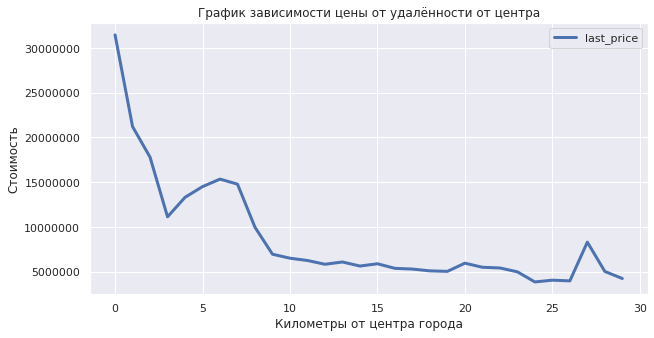

In [98]:
spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(figsize=(10,5), grid=True, linewidth=3, title='График зависимости цены от удалённости от центра')
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel('Километры от центра города')
plt.ylabel('Стоимость')

Чем дальше от центра города, тем меньше цена. Корреляция сильная. Особенно быстро цена падает первые 4 километра, но после 10 км график цены идёт относительно ровно.

#### Вывод

В общем и целом нам удалось:
* Изучить параметры таких объектов как: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления
* Изучить как быстро продаются квартиры. В среднем около 2-3 месяц. Наиболее быстрые продажи от недели до месяца. Наиболее долгие от 200 дней.
* Какие факторы больше всего влияют на общую стоимость объекта. Наиболее значимые факторы: общая площадь и жилая площадь. Средние по значимости: площадь кухни и количество комнат. Наименьшее влияние имеют тип этажа(последний, первый, другой) и день, месяц и год публикации.
* Выделить топ 10 населённый пунктов по количеству объявления. И посчитать наименьшую и наибольшую стоимость кв.м в них. Наибольшую стоимость имеют: Санкт-Петербург и Пушкин. Наименьшую стоимость имеют: Всеволожск и Выборг.
* Расчитать среднюю цену кажого километра до центра Санкт-Петербурга, она равняется 697989₽. А также установить что на стоимость объектов в Санкт-Петербурге сильно влияет расстояние от центра города, особенно большая разница наблюдается первые 4 км. После 10 км от центра, цена уже не так сильно падает

### Общий вывод

   <p>Подводя общий итог, можно сказать, что обработка и исследование данных прошли достаточно успешно. Мы столкнули с большим количеством пропусков и аномальных значений в данных, однако большинство из них удалось устранить. Большинство ошибок в данных, вероятно вызвано человеческим фактором, но также рекомендую коллегам проверить правильность алгоритма выгрузки данных, есть подозрения, что большая часть пропусков могла образоваться по причине некорректной работы алгоритма.</p>
   <p>После предобработки данных, в таблицу были добавлены следующие столбцы: цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние до центра города в километрах. Добавление этих данных заранее, сильно облегчило процесс исследования.</p>
   <p>В процессе исследования нам удалось установить факторы, наиболее влияющие на цену квартир. В первую очередь это общий объём площади и объём жилой площади. Также важными факторами стали количество комнат и площадь кухни, однако недвижимость с количеством больше 8 комнат, начинает резко падать в цене, вероятно проблема в необычной планировке и специализированности подобных помещений под конкретные нужды. Помимо этого, удалось установить что день недели, месяц и год публикации объявления не оказывает особо влияения на цену продажи квартиры. Однако график хорошо передал падение цен после 2014 года, резкое падение наблюдалось с 2014 по 2016, однако после цены нормализовались, после 2018 года наблюдается небольшой рост. Также важно отметить, что квартиры на первом этаже в среднем на 20 процентов дешевле, чем квартиры на других этажах. Далее по имеющимся данным, мы составили топ населённых пунктов по количеству объявления и посчитали цену за квадратный метр в них. Как и ожидалось в Санкт-Петербурге наибольшая цена за квадратный метр, как и набольшее количество объявлений. Наименьшая цена в Выборге.</p>
   <p>И под конец, самое важное, мы рассчитали стоимость каждого километра до центра Санкт-Петербурга у недвижимости внутри города. Она равняется 697989₽, на что определённо стоит обратить внимание. Также, ожидаемо, удалённость от центра влияет на цену объектов, особенно сильно это заметно на расстоянии первых 4 километров от центра. Средняя цена за это расстояние падает в три раза. После десятого километра от центра цена остаётся более менее равной.</p>
   <p>Это вся наиболее важная информация по моему исследованию, для удобства восприятия информации я составил графики и дал комментарии под каждым вычислением. Если будут вопросы, комментарии или критика по моему исследованию — обращайтесь.